# Exercises 1.

## 1.

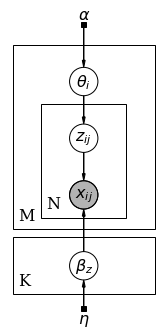

In [44]:
import daft
from matplotlib import rc

rc("font", family="serif", size=16)
scale = 1.25
pgm = daft.PGM()

pgm.add_node('alpha', r'$\alpha$', 1, 6, fixed=True, shape='rectangle')
pgm.add_node('theta', r'$\theta_i$', 1, 5)
pgm.add_node('z', r'$z_{ij}$', 1, 4)
pgm.add_node('x', r'$x_{ij}$', 1, 3, observed=True)
pgm.add_node('beta', r'$\beta_z$', 1, 1.75)
pgm.add_node('eta', r'$\eta$', 1, 1, fixed=True, offset=(0, -20), shape='rectangle')

pgm.add_edge('alpha', 'theta', directed=True)
pgm.add_edge('theta', 'z', directed=True)
pgm.add_edge('z', 'x', directed=True)
pgm.add_edge('beta', 'x', directed=True)
pgm.add_edge('eta', 'beta', directed=True)

pgm.add_plate([0.25, 2.6, 1.5, 2], 'N')
pgm.add_plate([-0.25, 2.4, 2.5, 3.25], 'M')
pgm.add_plate([-0.25, 1.25, 2.5, 1], 'K')

pgm.render()


In [ ]:
import tensorflow as tf
import tensorflow_probability.distributions as tfd
import pandas as pd

bank = pd.read_csv('bank-full.csv', delimiter=';')
bank = bank.loc[:, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'previous', 'poutcome']]
alpha = 1
eta = 1
# beta = (eta)
theta = tfd.Dirichlet(alpha)
z = tfd.Categorical(theta)
# x = (beta[z])